In [8]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [9]:
# 2.加载数据
iris = load_iris()
X = iris.data # 特征: (150,4)
y = iris.target #标签:(150,), 0/1/2对应三类鸢尾花

In [10]:
#分划数据集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [11]:
#标准化数据 避免不同特征数据差异化严重
#先实例化一个标准库
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled =scaler.transform(X_test)
x_train_scaled

array([[ 0.4822228 , -0.30920716,  1.00829037,  0.79110603],
       [-1.23001758, -0.0687127 , -1.42818115, -1.40932134],
       [ 0.11531415, -0.30920716,  0.37016688,  0.3785259 ],
       [-0.98541181,  1.13375957, -1.42818115, -1.40932134],
       [-1.10771469, -2.47365725, -0.20994539, -0.30910765],
       [-1.59692623,  1.37425403, -1.66022606, -1.40932134],
       [-0.98541181,  1.85524293, -1.3121587 , -1.40932134],
       [ 0.97143434,  0.65277066,  1.0663016 ,  1.20368616],
       [ 1.21604011,  0.17178175,  0.60221178,  0.3785259 ],
       [ 2.19446318,  1.85524293,  1.64641387,  1.34121287],
       [-0.37389739, -1.27118497,  0.02209951, -0.17158094],
       [-0.2515945 , -1.27118497,  0.66022301,  1.06615945],
       [ 0.72682857,  0.41227621,  0.71823424,  1.06615945],
       [-0.12929162, -1.03069052,  0.08011074, -0.03405423],
       [-1.35232046, -0.0687127 , -1.42818115, -1.27179463],
       [ 0.72682857, -0.0687127 ,  0.77624546,  1.06615945],
       [ 0.35991992, -1.

In [13]:
#处理标签 150个 单独的数字
#要使用独热编码:
#在分类任务中 模型最后一层输出 如果是多分类 那么就是softmax激活函数 输出多个神经元 
#每个神经元对应每个类别的概率
y_train = to_categorical(y_train,3)
y_train

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0

In [14]:
y_test = to_categorical(y_test,3)
y_test

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [19]:
#构建神经网络模型
#中括号包裹 架构
model = Sequential([
    #进入到隐藏层 神经元的个数 一般是64 128 256 512
    #需要给隐藏层加入激活函数
    Dense(128,activation='relu'),
    #一般神经网络隐藏层是1-5层
    Dense(64,activation='relu'),
    #输出层---全连接层 输出的应该有几个神经元? 3
    Dense(3,activation='softmax')
])

In [20]:
#查看模型结构
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
#神经网络 要先进行编译操作
model.compile(
    optimizer='adam', #优化的梯度算法
    #损失函数计算的是什么内容？
    #对于分类而言 : categorical——crossentropy
    loss='categorical_crossentropy',#分类的损失函数的计算方法
    #评估指标 accuracy
    metrics=['accuracy']
)

In [22]:
#训练模型
history = model.fit(
    X_train,
    y_train,
    epochs=10,#训练的次数
    batch_size=3,#每次训练10份数据
    validation_split=0.2 #从训练集拆分20%的数据来进行验证
)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4405 - loss: 1.0188 - val_accuracy: 0.4762 - val_loss: 0.8236
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6786 - loss: 0.7213 - val_accuracy: 0.7619 - val_loss: 0.6118
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8690 - loss: 0.5305 - val_accuracy: 0.7143 - val_loss: 0.5107
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8690 - loss: 0.4418 - val_accuracy: 0.7143 - val_loss: 0.4540
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8690 - loss: 0.4036 - val_accuracy: 0.8571 - val_loss: 0.3892
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9048 - loss: 0.3339 - val_accuracy: 0.8095 - val_loss: 0.3705
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8452 - loss: 0.3065 - val_accuracy: 0.8571 - val_loss: 0.3562
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9167 - loss: 0.2749 - val_accuracy: 0.9524 - val_loss

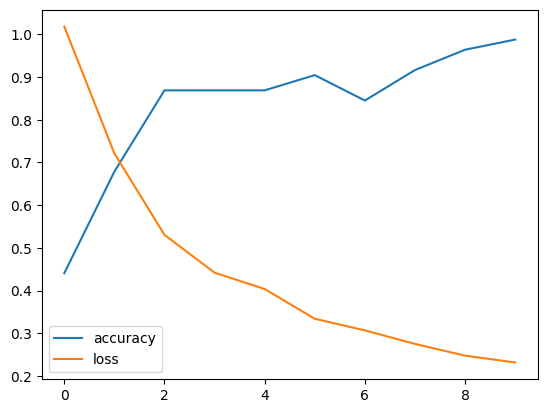

In [23]:
#将数据可视化
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['loss'],label='loss')
plt.legend()#让图例展示出来
plt.show()

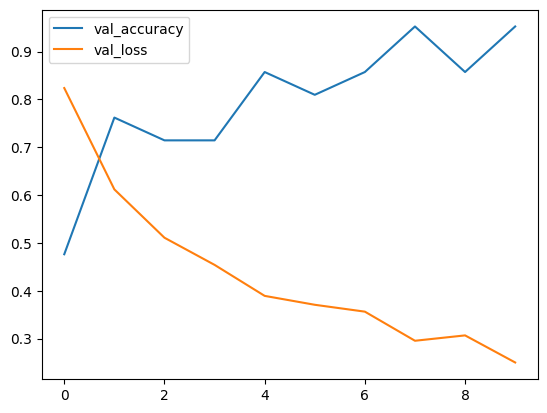

In [25]:
#将数据可视化
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [27]:
#模型的评估
test_loss,test_accuracy = model.evaluate(X_test,y_test)
print('测试的损失:',test_loss)
print('测试的准确率:',test_accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9778 - loss: 0.1452 
测试的损失: 0.1452295333147049
测试的准确率: 0.9777777791023254
